# Extract news articles from the path

Prepare dataset for news ML classifier.

In [49]:
# Getting the directory
import os
os.path.dirname(os.path.realpath('__file__'))

'/Users/amosmbp14/Jupyter notebook/News_classifier'

In [50]:
import pandas as pd

# Corrected file path
file_path = "/Users/amosmbp14/Jupyter notebook/News_classifier/dataset/news_for_ML.csv"

# Read the Excel file
news_art_df = pd.read_csv(file_path)

# Cleanning and pre-processing

Before cleanning, it shows some exploaratory data analysis:

In [51]:
news_df = news_art_df[["title", "body", "category", "sourceTitle"]]

In [52]:
news_df.head(5)

,title,body,category,sourceTitle
0,Can China’s loan rule ‘trick’ help grease the ...,National Administration of Financial Regulatio...,economy,South China Morning Post
1,State power: Xi calls for firmer government ha...,To ensure stability and security in decisive s...,economy,South China Morning Post
2,How to fix China’s economy? Investors are unsu...,Investor sentiment around China’s prospects ha...,economy,South China Morning Post
3,China spins up new party finance organ as prop...,"New commission, which began operations last mo...",economy,South China Morning Post
4,Commercial fishing groups sue 13 US tire maker...,"TACOMA, Wash. (AP) - The 13 largest U.S. tire ...",economy,Daily Mail Online


In [53]:
import pandas as pd
cat_counts = news_df['category'].value_counts()

# Display the counts of category
print(cat_counts)

economy        4989
politics       4173
technology     2784
law             857
environment     780
Name: category, dtype: int64


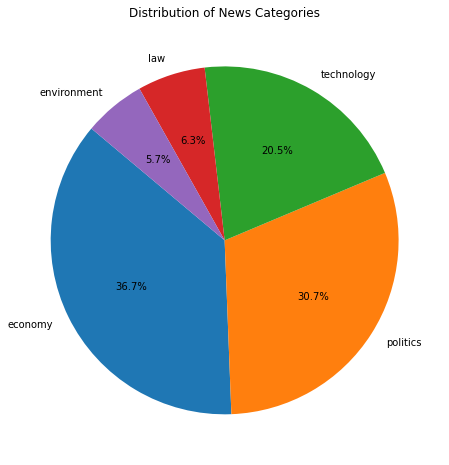

In [54]:
import matplotlib.pyplot as plt

# Assuming cat_counts is your category counts
labels = cat_counts.index
sizes = cat_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of News Categories')
plt.show()

In [55]:
import pandas as pd
source_counts = news_df['sourceTitle'].value_counts()

# Display the counts
print("News sources summary:")
print("")
print(source_counts)

News sources summary:

Daily Mail Online               3390
South China Morning Post        1246
The Guardian                    1169
Reuters                          780
The Independent                  745
Los Angeles Times                719
POLITICO                         594
The New York Times               592
CBS News                         500
CNN                              433
Mirror                           416
Fox News                         411
Euronews English                 396
The Telegraph                    300
The Sun                          282
NBC News                         223
The Wall Street Journal          215
Washington Post                  212
Sky News                         206
USA Today                        197
EXPRESS                          154
Metro                            123
MSNBC.com                         70
RadioFreeEurope/RadioLiberty      66
SWI swissinfo.ch                  62
HuffPost                          47
Bloomberg Busin

## Removing the stopwords and news agency features

In [56]:
import re
from nltk.corpus import stopwords

def standardize_sentences(sentences = None, agency_name = None):

  clean_sentences = []
  stop_words = set(stopwords.words('english'))

  for sentence in sentences:
    lower_text = sentence.lower() # Lowercasing text

    # regular expression for symbols
    reg_exp_text = re.sub('[^a-zA-Z]', ' ', lower_text)

    # remove stopwords
    clean_sentence = ' '.join(word for word in reg_exp_text.split() if word
                               not in stop_words)
    
    # Remove news agency names
    for agency_name in agency_names:
        clean_sentence = clean_sentence.replace(agency_name.lower(), '')

    # append clean sentences
    clean_sentences.append(clean_sentence)

  return clean_sentences

In [57]:
# Extract specific sentences to clean
body = news_df["body"]

# News agency names is needed to be removed
agency_names = [
    "dailymail", "south china morning post", "guardian", "reuters", "independent",
    "los angeles times", "politico", "the new york times", "cbs", "cnn",
    "mirror", "fox", "euronews", "telegraph", "sun", "nbc", "the wall street journal",
    "washington", "sky", "usa today", "express", "metro", "msnbc",
    "radiofreeeurope", "radioliberty", "swissinfo", "huffpost", "bloomberg", "gbnews",
    "news", "ap"
]

# Call the function to standardise the above text
clean_body = standardize_sentences(body)

In [58]:
news_df['clean_body'] = clean_body
news_df.head(5)

/var/folders/y_/_4lmv2450t13fk_011cwcn3h0000gn/T/ipykernel_11625/2923812256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['clean_body'] = clean_body


,title,body,category,sourceTitle,clean_body
0,Can China’s loan rule ‘trick’ help grease the ...,National Administration of Financial Regulatio...,economy,South China Morning Post,national administration financial regulation l...
1,State power: Xi calls for firmer government ha...,To ensure stability and security in decisive s...,economy,South China Morning Post,ensure stability security decisive sectors xi ...
2,How to fix China’s economy? Investors are unsu...,Investor sentiment around China’s prospects ha...,economy,South China Morning Post,investor sentiment around china prospects rema...
3,China spins up new party finance organ as prop...,"New commission, which began operations last mo...",economy,South China Morning Post,new commission began operations last month par...
4,Commercial fishing groups sue 13 US tire maker...,"TACOMA, Wash. (AP) - The 13 largest U.S. tire ...",economy,Daily Mail Online,tacoma wash largest u tire manufacturers faci...


## Labelling the news category

In [59]:
from sklearn.preprocessing import LabelEncoder

# Simplified dataframe for ML task
news_ML_df = news_df[["clean_body", "category"]]

# Extract categories
categories = news_ML_df['category']

# Call encoder for labelling the numeric classification
label_encoder = LabelEncoder()

# Covert categort into numeric categories
numeric_cat = label_encoder.fit_transform(categories)

# Mapping original and numeric categories
category_mapping = dict(zip(label_encoder.classes_,
                            label_encoder.transform(label_encoder.classes_)))
mapping_df = pd.DataFrame(list(category_mapping.items()),
                          columns = ['original category',
                                     'numeric category'])

# Replacing the original category
news_ML_df['category'] = numeric_cat

/var/folders/y_/_4lmv2450t13fk_011cwcn3h0000gn/T/ipykernel_11625/368605046.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_ML_df['category'] = numeric_cat


In [60]:
# show the mapping result of the category
print('Show the original categories and their cooresponding numeric \
value:')
print('')
print(mapping_df)

Show the original categories and their cooresponding numeric value:

  original category  numeric category
0           economy                 0
1       environment                 1
2               law                 2
3          politics                 3
4        technology                 4


In [61]:
# show the dataframe with numeric label for news category
news_ML_df.head()

,clean_body,category
0,national administration financial regulation l...,0
1,ensure stability security decisive sectors xi ...,0
2,investor sentiment around china prospects rema...,0
3,new commission began operations last month par...,0
4,tacoma wash largest u tire manufacturers faci...,0


## Tokenization

New "tokenized_body" column tokenize all the words from the column "clean_body".

In [62]:
# Tokenize the body
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# nltk.download('punkt')

# Tokenize the body
news_ML_df['tokenized_body'] = news_ML_df['clean_body'].apply(word_tokenize)

/var/folders/y_/_4lmv2450t13fk_011cwcn3h0000gn/T/ipykernel_11625/1567307585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_ML_df['tokenized_body'] = news_ML_df['clean_body'].apply(word_tokenize)


In [63]:
# Show the new cols tokenized_body and freq_tokens
news_ML_df.head(3)

,clean_body,category,tokenized_body
0,national administration financial regulation l...,0,"[national, administration, financial, regulati..."
1,ensure stability security decisive sectors xi ...,0,"[ensure, stability, security, decisive, sector..."
2,investor sentiment around china prospects rema...,0,"[investor, sentiment, around, china, prospects..."


Then, it should remove "[]" for tokenized_body and freq_tokens

In [65]:
tokenized_df = news_ML_df[["tokenized_body","category"]]
tokenized_df["tokenized_body"] = tokenized_df['tokenized_body'].apply(' '.join)

/var/folders/y_/_4lmv2450t13fk_011cwcn3h0000gn/T/ipykernel_11625/3582925525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokenized_df["tokenized_body"] = tokenized_df['tokenized_body'].apply(' '.join)


Show the columns after removing "[]": 

In [66]:
tokenized_df["tokenized_body"]

0        national administration financial regulation l...
1        ensure stability security decisive sectors xi ...
2        investor sentiment around china prospects rema...
3        new commission began operations last month par...
4        tacoma wash largest u tire manufacturers facin...
                               ...                        
13578    woman revealed ordered pair clip veneers temu ...
13579    billionaire makes emotional decision return ch...
13580    take glance around airport baggage claim clear...
13581    nov inpost core earnings surged third quarter ...
13582    terrifying grim reers garish pumpkin heads spo...
Name: tokenized_body, Length: 13583, dtype: object

In [67]:
# Displayed the tokenized dataframe 
tokenized_df.head()

,tokenized_body,category
0,national administration financial regulation l...,0
1,ensure stability security decisive sectors xi ...,0
2,investor sentiment around china prospects rema...,0
3,new commission began operations last month par...,0
4,tacoma wash largest u tire manufacturers facin...,0


# Split the data: Training and Testing dataset

In [68]:
# Getting the training and label data
X = tokenized_df["tokenized_body"]
y = tokenized_df["category"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.30, random_state = 90)

Show the datasets shape after splitting:

In [70]:
print(X_train.shape)

(9508,)


In [71]:
print(X_test.shape)

(4075,)


# Training the Classifier

## TF-IDF Vectorizer

TF-IDF, known as Term Frequency - Inverse Document Frequency, is a combination of two technique. "Term Frequency" focuses on how common the word appears and give importance to frequent words. "Inverse Document Frequency" focuses on rarity of words.

## Logistic Regression classifier

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# pipeline for data processing
# max_iteration = num of iteration before solvers converged
lr_model = Pipeline([('tfidf', TfidfVectorizer()),
              ('clf', LogisticRegression(max_iter = 1000)),
              ])

# Train the logistic Regression model
lr_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=1000))])

In [73]:
# Make predictions on the test set
lr_train_preds = lr_model.predict(X_train)
lr_test_preds = lr_model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

lr_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)
lr_precision = precision_score(y_train, lr_train_preds, average = 'weighted')
lr_f1_score = f1_score(y_train, lr_train_preds, average = 'weighted')

# Calculate the accuracy of the model
print(f"Training accuracy: {lr_train_accuracy}")
print(f"Test accuracy: {lr_test_accuracy}")
print(f"Precision_score: {lr_precision}")
print(f"F1 score: {lr_f1_score}")

Training accuracy: 0.9548801009676062
Test accuracy: 0.912883435582822
Precision_score: 0.9548280693656749
F1 score: 0.954726715710525


Comment: Good performance on training the model precdiction accuracy and generalise the prediction to unseen data. Class prediction is precised,the model accuracy is high.

In [75]:
from sklearn.metrics import classification_report

lr_classification_report = classification_report(y_test, lr_test_preds)

print("lr_classification_report:\n", lr_classification_report)

lr_classification_report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1545
           1       0.92      0.84      0.88       217
           2       0.89      0.78      0.83       263
           3       0.95      0.95      0.95      1261
           4       0.90      0.87      0.89       789

    accuracy                           0.91      4075
   macro avg       0.91      0.88      0.89      4075
weighted avg       0.91      0.91      0.91      4075



Comment: Overall, good performance for all categories classification.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import learning_curve

def plot_cv(model = None, cv_num = None):

    # Cross validation
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv_num, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Plot
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    
    return plt

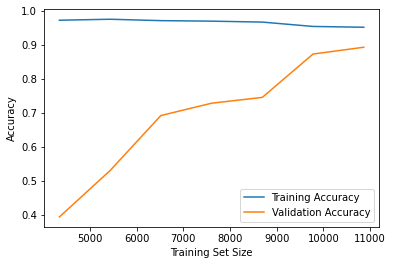

In [77]:
from sklearn.exceptions import FitFailedWarning

# Filter warnings to ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Visualise the cross validation
lr_CVplot = plot_cv(model = lr_model, cv_num = 5)

# Reset the warnings to their default behavior
warnings.resetwarnings()

Comment: No overfitting and underfitting issue.

Next, it attempts to deploy the model to predict the news.

In [78]:
from collections import Counter
from collections import Counter
import numpy as np

def predict_news_category(predicted):
    # Set up the category mapping
    cat_mapping = {0: 'economy', 1: 'environment', 
                   2: 'law', 3: 'politics', 
                   4: 'technology'}
    
    # Convert NumPy array to a Python list
    predicted_list = predicted.tolist() if isinstance(predicted, np.ndarray) else predicted
    
    # Condition 1: predicted is a single value
    if not isinstance(predicted_list, list):
        predicted_list = [predicted_list]
    
    # Flatten the list if it's a list of lists
    if all(isinstance(i, list) for i in predicted_list):
        predicted_list = [item for sublist in predicted_list for item in sublist]
    
    # Condition 2: predicted is not a single value, find mode
    counter = Counter(predicted_list)
    max_count = max(counter.values())
    modes = [num for num, freq in counter.items() if freq == max_count]
    
    # Map the mode from condition 2 to category names
    predicted_cat = [cat_mapping[label] for label in modes]

    return predicted_cat

In [79]:
bbc_econ_news = ["Britain’s stuttering economy will be stuck in the growth slow lane for the next three years as inflation and interest rates stay higher for longer than previously forecast.\
Latest forecasts from the Government’s economic watchdog, the Office for Budget Responsibility (OBR), released to coincide with the Autumn Statement, show projections for GDP growth have been slashed out as far as 2027.\
Although growth this year is expected to advance 0.6%, faster than the 0.2% expected at the time of the Budget in March, forecasts for subsequent years have been hacked back, although the OBR does not foresee any threat of a recession.\
Next year will see GDP advance by a feeble 0.7%, compared with a projected 1.8% in March. The following year also has growth forecasts downgraded by 1.1%, from 2.5% to 1.1%.\
By 2026 it has accelerated to 2%, little different to the 2.1% at the time of the Budget, and in 2027 the OBR expects a further 2% GDP boost.\
The OBR said that the revisions to its forecasts meant “in our central forecast, the level of real GDP in 2027 is only 0.6 per cent higher than March.”\
Its Economic and Fiscal Outlook report adds: “Squeezed real wages, higher interest rates, and unwinding government support all weigh on economic activity, opening up a moderate degree of spare capacity over the next three years.”\
However, stronger than expected demand this year means that the inflation spike is expected to subside less quickly than previously hoped The OBR now warns that inflation is expected “to remain higher for longer, taking until the second quarter of 2025 to return to the 2 per cent target, more than a year later than forecast in March.”\
As a result of the persistent inflation the Bank of England will only be able to lower interest rates slowly from their current level of 5.25, according to the OBR. It points out that “markets now expect Bank Rate to settle at 4 per cent by the end of the forecast, rather than fall to 3 per cent as we assumed in March."]

In [80]:
# Predict the econ news, cat 0
lr_pred_econ = lr_model.predict(bbc_econ_news)
print(predict_news_category(lr_pred_econ))

['economy']


In [81]:
bbc_env_news = ["The world is breaching a key warming threshold at a rate that has scientists concerned, a BBC analysis has found. On about a third of days in 2023, the average global temperature was at least 1.5C higher than pre-industrial levels. Staying below that marker long-term is widely considered crucial to avoid the most damaging impacts of climate change.\
But 2023 is on track to be the hottest year on record, and 2024 could be hotter. It is a sign that we are reaching levels we haven not been before, says Dr Melissa Lazenby, from the University of Sussex. This latest finding comes after record September temperatures and a summer of extreme weather events across much of the world. Climate change played major role in Libya floods\
Antarctic ice at mind-blowing low alarms experts UN calls for radical changes to slow warming When political leaders gathered in Paris in December 2015, they signed an agreement to keep the long-term rise in global temperatures this century well below 2C and to make every effort to keep it under 1.5C.\
The agreed limits refer to the difference between global average temperatures now and what they were in the pre-industrial period, between 1850 and 1900 - before the widespread use of fossil fuels.\
Breaching these Paris thresholds does not mean going over them for a day or a week but instead involves going beyond this limit across a 20 or 30-year average\
This long-term average warming figure currently sits at around 1.1C to 1.2C.\
But the more often 1.5C is breached for individual days, the closer the world gets to breaching this mark in the longer term.\
The first time this happened in the modern era was for a few days in December 2015, when politicians were signing the deal on the 1.5C threshold. Since then the limit has been repeatedly broken, typically only for short periods\
In 2016, influenced by a strong El Niño event - a natural climate shift that tends to increase global temperatures - the world saw around 75 days that went above that mark.\
But BBC analysis of data from the Copernicus Climate Change Service shows that, up to 2 October, around 86 days in 2023 have been over 1.5C warmer than the pre-industrial average. That beats the 2016 record well before the end of the year.\
There is some uncertainty in the exact number of days that have breached the 1.5C threshold, because the numbers reflect a global average which can come with small data discrepancies. But the margin by which 2023 has already passed 2016 figures gives confidence the record has already been broken.\
The fact that we are reaching this 1.5C anomaly daily, and for a longer number of days, is concerning, said Dr Lazenby. One important factor in driving up these temperature anomalies is the onset of El Niño conditions. This was confirmed just a few months ago - although it is still weaker than its 2016 peak.\
These conditions are helping to pump heat from the eastern Pacific Ocean into the atmosphere. This may explain why 2023 is the first year in which the 1.5C anomaly has been recorded between June and October - when combined with the long-term warming from burning fossil fuels.\
A really simple guide to climate change Four ways climate change affects the weather What is El Niño, and how does it change the weather? This is the first time we are seeing this in the northern hemisphere summer, which is unusual, its pretty shocking to see what been going on, said Prof Ed Hawkins, from the University of Reading.\
I know our Australian colleagues are particularly worried about what is going to be the consequences for them with their summer approaching [for instance extreme wildfires], especially with El Niño. Days when the temperature difference has exceeded 1.5C continued into September, with some more than 1.8C above the pre-industrial average.\
The month as a whole was 1.75C above the pre-industrial level, and the year to date is around 1.4C above the 1850-1900 average, according to the Copernicus Climate Change Service. While 2023 is on track to become the warmest year on record, it is not expected to breach the 1.5C warming threshold as a global average across the full 12 months.\
Contributing factors The worlds oceans have also been experiencing unusually high temperatures this year and in turn, releasing further heat into the atmosphere. The North Atlantic Ocean is the warmest we ever recorded, and if you look at the North Pacific Ocean, there is a tongue of anomalously warm water stretching all the way from Japan to California, said Dr Jennifer Francis from the Woodwell Climate Research Centre in the US.\
While greenhouse gas emissions are increasing average temperatures, the precise reasons for why these sea temperatures have surged is not fully known. One theory - which is still uncertain - is that a fall in air pollution from shipping across the North Atlantic has reduced the number of small particles and increased warming. Up until now, these aerosols had been partly offsetting the effect of greenhouse gas emissions by reflecting some of the sun energy and keeping the Earth surface cooler than it would have been otherwise.\
Another perhaps less well-known factor is the situation around Antarctica. There have been ongoing concerns about the state of sea ice around the coldest continent, with data showing the levels far below any previous winter.\
But according to some experts, two spikes in temperature in recent months in Antarctica - triggered by natural variability - have boosted the global average. However, it is difficult to identify the precise influence of long-term human-caused warming.\
In early July, Antarctica got really warm, they saw record temperatures, which is still 20 or 30 degrees Celsius below zero, said Dr Karsten Haustein, from the University of Leipzig. And what we see with 1.5C and 1.8C anomalies we are seeing now, it is partially down to Antarctica again."]

In [82]:
# Predict the envriomental news, cat 1
lr_pred_env = lr_model.predict(bbc_env_news)
print(predict_news_category(lr_pred_env))

['economy']


In [83]:
law_news = ["Oil giant Shell could be sued in London by 13,000 Nigerian fishermen and farmers for allegedly violating their right to a clean environment under Nigerian law, the High Court has ruled.\
The multinational company is facing group litigation arising out of oil contamination, including both in the ground and in water, affecting two distinct areas in the Niger Delta – the Bille and Ogale regions.\
It is alleged that Shell failed to prevent, mitigate or remediate oil contamination resulting from spills and thefts from Shell’s pipelines and associated infrastructure operated in or near to the two regions.\
The court heard that Nigerian law recognises as a fundamental right the right to a clean and healthy environment, something the claimants rely upon. However Shaheed Fatima KC, for Shell, argued these constitutional claims had no real prospect of success as a matter of Nigerian law. Such claims cannot be brought against private companies, she said, and claims in respect of pollution damage fall outside the limited scope of the rights invoked by the claimants under the African Charter and Nigerian Constitution.\
But Mrs Justice May ruled on Wednesday that the constitutional claims were ‘arguable’. She added: ‘As sensible and logical as Ms Fatima’s elucidation of the Nigerian legal position appeared to me to be, based on the authorities to which she directed me, it is subject to this important reservation: Ms Fatima is not a Nigerian law expert and neither am I.’\
She continued: 'What she says about the likely impact of those decisions on the constitutional claims as pleaded here may be right, however in the absence of evidence of Nigerian law I am not prepared to apply the ancillary point as she has interpreted it so as to rule the claims devoid of any real prospect of success at this stage.'\
The judge said any issue of Nigerian law would have to be resolved by factual evidence from expert Nigerian lawyers."]

In [84]:
# Predict the law news, cat 2
lr_pred_law = lr_model.predict(law_news)
print(predict_news_category(lr_pred_law))

['economy']


In [85]:
bbc_pol_news = ["Chancellor Jeremy Hunt has said most working-age benefits will rise by 6.7%, \
as he outlined plans to limit welfare access to the long-term jobless. Mr Hunt increased benefits \
in line with September inflation rate, ending speculation of a less generous offer. But he said it \
was wrong that thousands of people were on benefits with no requirement to look for work. He said \
reforms including stricter fit-to-work tests and jobseeker support would get 200,000 more people in work.\
He described the package as the biggest set of welfare reforms in a decade in his second Autumn Statement \
as chancellor on Wednesday. But disability rights groups criticised the move, with Scope describing the \
chancellor statement as a disastrous plan that demonises disabled people. The changes are part of the UK \
government £2.5bn back-to-work plan, which is aiming to get more long-term jobless people and those with \
health conditions and disabilities to look for employment. In recent months, Mr Hunt, Prime Minister Rishi \
Sunak and Mel Stride, the work and pensions secretary, have spoken of their desire to get more people off \
benefits and into work. Since the pandemic, the number of people out of work because of long-term sickness \
or disability has risen to a record high of 2.6 million, with mental health and heart disease among some of \
the main causes. Under its plans, the government wants to scrap the controversial Work Capability Assessment,\
which is used to determine if people can receive additional benefits payments because of a health condition \
or disability. At the moment, eligible claimants can receive £390 a month (£4,681 per year) on top of other\
benefits payments. Due to be introduced from 2025, the changes mean hundreds of thousands of people with \
mobility and mental-health problems will be told to look for work they can do from home.\
We will reform the work capability assessment to reflect greater flexibility and availability of home working\
after the pandemic, Mr Hunt said. And we will spend £1.3bn over the next five years to help nearly 700,000 \
people with health conditions find jobs. In her response to Mr Hunts speech, shadow chancellor Rachel Reeves \
said Work Capability Assessments were discouraging people from seeking work and argued it was right to \
replace them. But she said the government was failing to face up to the problem of long NHS waiting lists \
leaving people out of work in the long term. Green co-leader Carla Denyer said the Autumn Statement would \
not protect people from the harm caused by the cost-of-living crisis. This was a particularly cruel \
statement for the long-term sick and some disabled people who will now be forced into work or lose \
their benefits, she said. James Taylor, director of strategy at disability equality charity Scope, \
said the Autumn Statement was a missed opportunity to set out how disabled people can thrive. \
Instead, now many will be thinking how they will survive, he said. Dr Sarah Hughes, chief executive \
of the mental health charity Mind, called the Autumn Statement a backwards step for the UK, which \
people with mental health problems will feel sharply. Changes to the way people are assessed to be \
well enough to work are brazenly motivated by a desire to save money, driven by baseless assumptions \
about disabled people and hugely stigmatising, Dr Hughes said. Tougher sanctions\
In its economic forecast, the Office for Budget Responsibility (OBR) said the government welfare reforms\
would increase employment by about 50,000 over the next five years.\
This will lead to a small positive impact of 0.04% on gross domestic product (GDP) as entrants are likely\
to join on lower than average hours and earnings, according to the OBR.\
Mr Hunt said the OBR projected the reforms would more than halve the net flow of people who are signed off\
work with no work search requirements. There will also be £1.3bn of funding to offer extra help to 300,000\
people who have been unemployed for more than a year. Benefit claimants who fail to find work for more than\
18 months will have to do a work experience placement. Stricter penalties will also apply to long-term\
unemployed people who the government decide are not adequately looking for jobs."]

In [86]:
# Predict the politics news, cat 3
lr_pred_pol = lr_model.predict(bbc_pol_news)
print(predict_news_category(lr_pred_pol))

['economy']


In [87]:
bbc_tech_news = ["picture a boardroom battle at a multi-billion-dollar company whose futuristic tech might either save or destroy the world. Its chief executive, who has the ear of world leaders, toppled as senior colleagues turn on him - only for the rest of the company to demand they themselves should be fired. No, that is not my pitch for a Netflix drama, that is basically been the past few days at OpenAI.\
Tech journalists, enthusiasts and investors have been binge-watching it all unfold - though opinions differ as to whether it was a high-stakes thriller or a farce. How it started... The battle at the top of OpenAI, the creator of the AI chatbot ChatGPT, began very suddenly on Friday, when the board of directors announced that it was firing the co-founder and chief executive, Sam Altman. In a blog post the board accused Mr Altman of not being consistently candid in his communications, and said as a result they had lost confidence in his leadership.\
There are only six people on that board - and two of them were Sam Altman and his co-founder Greg Brockman who quit after Mr Altman was dismissed. So four people who knew Mr Altman and the business well reached a breaking point of such seriousness that they sprung into action immediately, blindsiding the entire tech community including, reportedly, their own investors.\
Elon Musk - also an original co-founder at OpenAI - wrote on X, formerly Twitter, that he was very worried. Ilya Sutskever, the firm chief scientist, was a member of that board and would not take such drastic action unless he felt it was absolutely necessary, he wrote. Mr Sutskever has now expressed his own regret - and is one of the many signatories of a dynamite letter to the board of directors, calling for Mr Altman and Mr Brockman to return and suggesting they may leave OpenAI if the men are not reinstated.\
Skip twitter post by Ilya Sutskever What caused this row So what was it that sparked this rapidly rolling snowball? We actually still dont know - but lets consider some options. There are reports that Mr Altman was considering some hardware projects, including the funding and development of an AI chip, which would have been quite a different direction in which to take OpenAI. Had he made some commitments that the board was not aware of?\
Or could it boil down to a very old, and very human tension: money? In an internal memo, whose contents have been widely reported, the board made it clear that it was not accusing Mr Altman of any financial malfeasance. But we know that OpenAI was founded as a non-profit organisation. That means, a company which does not aim to make money. It takes back enough of what it brings in to cover its own running costs - and any extra gets invested back into the business. Most charities are non-profits.\
In 2019, a new arm of the firm was formed - and this part of it was profit-orientated. The firm set out how the two would co-exist. The profit side would be led by the non-profit side, and there would be a cap imposed on the returns investors could earn. Not everybody was happy about it - it was said to have been a key reason behind Elon Musks decision to walk away from the firm. OpenAI, however, now finds itself in the happy circumstance of being worth an awful lot of money. A staff stock sale, which has not gone ahead today, was reportedly valued at $86bn (£68bn).\
Could it be that there were ambitions to make the for-profit side of the business more powerful? OpenAI is in pursuit of AGI - artificial general intelligence. It does not exist yet, and it is a cause of both fear and awe. It is basically the idea that there will one day be AI tools that will be able to do a number of tasks, as well as, or better than, humans (thats us) currently can. It is got the potential to shift the entire way in which we do things. Jobs, money, education - all of that gets thrown up in the air when machines can do stuff instead. It is an incredibly powerful bit of kit - or at least, it will be.\
Is OpenAI closer to that than we realise, and does Mr Altman know this? At a very recent speech he said what was coming next year would make the current ChatGPT bot look like a quaint relative. I think it is unlikely. Emmett Shear, the new interim chief executive of OpenAI, posted on X that the board did *not* remove Sam over any specific disagreement on safety. He says there will be an investigation into what happened.\
But Microsoft, OpenAI biggest investor, has decided not to take a chance on Mr Altman taking this tech elsewhere. He will be joining the Seattle-based tech giant, it has been announced, to lead a yet-to-be-created AI research team. His co-founder Greg Brockman goes with him, and judging from the number of staff members posting on X today, it looks like hell be taking some of OpenAI top talent too. Many OpenAI staff members are sharing the same post on X. It reads: OpenAI is nothing without its people.\
Is that a warning to Mr Shear that he might have some hiring to do? A BBC colleague outside OpenAI headquarters just told me at 0930 in San Francisco, there were no signs of people arriving for work. Or is it just a reminder that for all this saga has been about a form of technology that is reshaping the world, it is, at its heart, a very human drama."]

In [88]:
# Predict the technology news, cat 4
lr_pred_tech = lr_model.predict(bbc_tech_news)
print(predict_news_category(lr_pred_tech))

['economy']


## Random Forest Classifer

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# pipeline for data processing
rf_model = Pipeline([('tfidf', TfidfVectorizer()),
              ('clf', RandomForestClassifier()),
              ])

# Train the logistic Regression model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [90]:
# Make predictions on the test set
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_precision = precision_score(y_train, rf_train_preds, average = 'weighted')
rf_f1_score = f1_score(y_train, rf_train_preds, average = 'weighted')

# Calculate the accuracy of the model
print(f"Training accuracy: {rf_train_accuracy}")
print(f"Test accuracy: {rf_test_accuracy}")
print(f"Precision score: {rf_precision}")
print(f"F1 score: {rf_f1_score}")

Training accuracy: 0.9822254943205722
Test accuracy: 0.8993865030674847
Precision score: 0.9822299192860552
F1 score: 0.9822192419358691


In [92]:
from sklearn.metrics import classification_report

rf_classification_report = classification_report(y_test, rf_test_preds)

print("rf_classification_report:\n", rf_classification_report)

rf_classification_report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1545
           1       0.95      0.71      0.81       217
           2       0.90      0.75      0.82       263
           3       0.92      0.96      0.94      1261
           4       0.91      0.85      0.88       789

    accuracy                           0.90      4075
   macro avg       0.91      0.84      0.87      4075
weighted avg       0.90      0.90      0.90      4075



Comment: The random forest model has good performance on training data and generalise the unseen data. According to the precision score, 98% of time that the random forest model can classify the news to its categories correctly during the prediction. The F1 socore showed that both precision and recall are high. It indiciated that the model can classify the news accurately. 

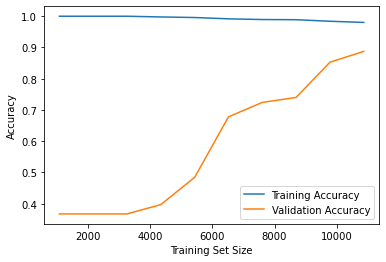

In [93]:
from sklearn.exceptions import FitFailedWarning

# Filter warnings to ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Visualise the cross validation
rf_CVplot = plot_cv(model = rf_model, cv_num = 5)

# Reset the warnings to their default behavior
warnings.resetwarnings()

Comment: No overfitting and underfitting issue can be identified.

Next, it attempt the predict the news by deploying the random forest model.

In [94]:
# Predict the econ news, cat 0
rf_pred_econ = rf_model.predict(bbc_econ_news)
print(predict_news_category(rf_pred_econ))

['economy']


In [95]:
# Predict the envriomental news, cat 1
rf_pred_env = rf_model.predict(bbc_env_news)
print(predict_news_category(rf_pred_env))

['environment']


In [96]:
# Predict the law news, cat 2
rf_pred_law = rf_model.predict(law_news)
print(predict_news_category(rf_pred_law))

['economy']


In [97]:
# Predict the politics news, cat 3
rf_pred_pol = rf_model.predict(bbc_pol_news)
print(predict_news_category(rf_pred_pol))

['economy']


In [98]:
# Predict the technology news, cat 4
rf_pred_tech = rf_model.predict(bbc_tech_news)
print(predict_news_category(rf_pred_tech))

['technology']


## Multinomial Naive Bayes classifier

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

multi_nb_model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
])

multi_nb_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [100]:
# Make predictions on the test set
mnb_train_preds = multi_nb_model.predict(X_train)
mnb_test_preds = multi_nb_model.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

mnb_train_accuracy = accuracy_score(y_train, mnb_train_preds)
mnb_test_accuracy = accuracy_score(y_test, mnb_test_preds)
mnb_precision = precision_score(y_train, mnb_train_preds, average = 'weighted')
mnb_f1_score = f1_score(y_train, mnb_train_preds, average = 'weighted')

# Calculate the accuracy of the model
print(f"Training accuracy: {mnb_train_accuracy}")
print(f"Test accuracy: {mnb_test_accuracy}")
print(f"Precision score: {mnb_precision}")
print(f"F1 score: {mnb_f1_score}")

Training accuracy: 0.8033235170382835
Test accuracy: 0.7948466257668712
Precision score: 0.7753316394245197
F1 score: 0.7526674580626016


/Users/amosmbp14/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
from sklearn.metrics import classification_report

mnb_classification_report = classification_report(y_test, mnb_test_preds)

print("mnb_classification_report:\n", mnb_classification_report)

mnb_classification_report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      1545
           1       1.00      0.01      0.03       217
           2       0.00      0.00      0.00       263
           3       0.78      0.98      0.86      1261
           4       0.92      0.73      0.82       789

    accuracy                           0.79      4075
   macro avg       0.69      0.53      0.51      4075
weighted avg       0.76      0.79      0.74      4075



/Users/amosmbp14/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amosmbp14/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amosmbp14/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comment: Overall, the multinomial naive bayes has decreased training and testing accuracy, but it sill under the acceptable level. However, it has poor performance to classify news into category 1 and 2. So this multinomial NB model will not be deployed for any news category prediction. Also, the classification report shows that the model may have poor performance in classifying law and environmental news.

In [103]:
# Predict the econ news, cat 0
mnb_pred_econ = multi_nb_model.predict(bbc_econ_news)
print(predict_news_category(mnb_pred_econ))

['economy']


In [104]:
# Predict the envriomental news, cat 1
mnb_pred_env = multi_nb_model.predict(bbc_env_news)
print(predict_news_category(mnb_pred_env))

['economy']


In [105]:
# Predict the law news, cat 2
mnb_pred_law = multi_nb_model.predict(law_news)
print(predict_news_category(mnb_pred_law))

['politics']


In [106]:
# Predict the politics news, cat 3
mnb_pred_pol = multi_nb_model.predict(bbc_pol_news)
print(predict_news_category(mnb_pred_pol))

['politics']


In [107]:
# Predict the technology news, cat 4
mnb_pred_tech = multi_nb_model.predict(bbc_tech_news)
print(predict_news_category(mnb_pred_tech))

['technology']


## Support Vector Machine

In [108]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Use TfidfVectorizer for text data
    ('clf', SVC())                 # Support Vector Machine classifier
])

# Train the model
svm_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [109]:
# Make predictions on the test set
svm_train_preds = svm_model.predict(X_train)
svm_test_preds = svm_model.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
svm_precision = precision_score(y_train, svm_train_preds, average = 'weighted')
svm_f1_score = f1_score(y_train, svm_train_preds, average = 'weighted')

# Calculate the accuracy of the model
print(f"Training accuracy: {svm_train_accuracy}")
print(f"Test accuracy: {svm_test_accuracy}")
print(f"Precision score: {svm_precision}")
print(f"F1 score: {svm_f1_score}")

Training accuracy: 0.9775978123685317
Test accuracy: 0.9106748466257669
Precision score: 0.9775884673918477
F1 score: 0.9775440394777775


In [111]:
from sklearn.metrics import classification_report

svm_classification_report = classification_report(y_test, svm_test_preds)

print("mnb_classification_report:\n", svm_classification_report)

mnb_classification_report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1545
           1       0.91      0.82      0.86       217
           2       0.90      0.81      0.85       263
           3       0.95      0.95      0.95      1261
           4       0.91      0.86      0.88       789

    accuracy                           0.91      4075
   macro avg       0.91      0.88      0.89      4075
weighted avg       0.91      0.91      0.91      4075



Comment: The SVM model performed well in training and generalising unseen data. The precision of categorising the news is high during the prediciton. The classification report showed that all categories could be classified well in general. 

In [ ]:
from sklearn.exceptions import FitFailedWarning

# Filter warnings to ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Visualise the cross validation
svm_CVplot = plot_cv(model = svm_model, cv_num = 5)

# Reset the warnings to their default behavior
warnings.resetwarnings()

Comment: No overfitting and underfitting can be identified.

Next, it deploys the model to predict the news categories.

In [ ]:
# Predict the econ news, cat 0
svm_pred_econ = svm_model.predict(bbc_econ_news)
print(predict_news_category(svm_pred_econ))

In [ ]:
# Predict the envriomental news, cat 1
svm_pred_env = svm_model.predict(bbc_env_news)
print(predict_news_category(svm_pred_env))

In [ ]:
# Predict the law news, cat 2
svm_pred_law = svm_model.predict(law_news)
print(predict_news_category(svm_pred_law))

In [ ]:
# Predict the politics news, cat 3
svm_pred_pol = svm_model.predict(bbc_pol_news)
print(predict_news_category(svm_pred_pol))

In [ ]:
# Predict the technology news, cat 4
svm_pred_tech = svm_model.predict(bbc_tech_news)
print(predict_news_category(svm_pred_tech))

## Decision Tree

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

dt_model = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Use TfidfVectorizer for text data
    ('clf', SVC())                 # Support Vector Machine classifier
])

# Train the model
dt_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)
dt_precision = precision_score(y_train, dt_train_preds, average = 'weighted')
dt_f1_score = f1_score(y_train, dt_train_preds, average = 'weighted')

# Calculate the accuracy of the model
print(f"Training accuracy: {dt_train_accuracy}")
print(f"Test accuracy: {dt_test_accuracy}")
print(f"Precision score: {dt_precision}")
print(f"F1 score: {dt_f1_score}")

In [ ]:
from sklearn.metrics import classification_report

dt_classification_report = classification_report(y_test, dt_test_preds)
print("Classification report:\n", dt_classification_report)

Comment: This DT model preform well in training and generalise unseen data. Precision of categorizing news is high in the predicion and dataset.

In [ ]:
from sklearn.exceptions import FitFailedWarning

# Filter warnings to ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Visualise the cross validation
dt_CVplot = plot_cv(model = dt_model, cv_num = 5)

# Reset the warnings to their default behavior
warnings.resetwarnings()

Next, it deploy the decision tree model to predict the news category.

In [ ]:
# Predict the econ news, cat 0
dt_pred_econ = dt_model.predict(bbc_econ_news)
print(predict_news_category(dt_pred_econ))

In [ ]:
# Predict the envriomental news, cat 1
dt_pred_env = dt_model.predict(bbc_env_news)
print(predict_news_category(dt_pred_env))

In [ ]:
# Predict the law news, cat 2
dt_pred_law = dt_model.predict(law_news)
print(predict_news_category(dt_pred_law))

In [ ]:
# Predict the politics news, cat 3
dt_pred_pol = dt_model.predict(bbc_pol_news)
print(predict_news_category(dt_pred_pol))

In [ ]:
# Predict the technology news, cat 4
dt_pred_tech = dt_model.predict(bbc_tech_news)
print(predict_news_category(dt_pred_tech))

## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with TfidfVectorizer and KNN classifier
knn_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', KNeighborsClassifier())
])


# Parameter for grid search
grid_param = {'clf__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# grid search object
grid_search = GridSearchCV(knn_model, grid_param, cv=5,
                          scoring = 'accuracy',
                          n_jobs = -1)

# fit the grid search on training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}".format(grid_search.best_score_))

In [ ]:
# Get the best model
best_knn_model = grid_search.best_estimator_
best_knn_model

In [ ]:
# Make predictions on the test set
knn_train_preds = best_knn_model.predict(X_train)
knn_test_preds = best_knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
svm_precision = precision_score(y_train, svm_train_preds, average = 'weighted')
svm_f1_score = f1_score(y_train, svm_train_preds, average = 'weighted')

# Calculate the accuracy of the model
print(f"Training accuracy: {svm_train_accuracy}")
print(f"Test accuracy: {svm_test_accuracy}")
print(f"Precision score: {svm_precision}")
print(f"F1 score: {svm_f1_score}")

In [ ]:
from sklearn.metrics import classification_report
knn_class_report = classification_report(y_test, knn_test_preds)
print("Classification Report:\n", knn_class_report)

Comment: This knn model performs well in training and generalising unseen data. Overall it is precised to categorize the news in prediction and dataset. However, the classification report shows that the category 2, law news category, may have lower accuracy during the classification.

In [ ]:
# Predict the econ news, cat 0
knn_pred_econ = best_knn_model.predict(bbc_econ_news)
print(predict_news_category(knn_pred_econ))

In [ ]:
# Predict the envriomental news, cat 1
knn_pred_env = best_knn_model.predict(bbc_env_news)
print(predict_news_category(knn_pred_env))

In [ ]:
# Predict the law news, cat 2
knn_pred_law = best_knn_model.predict(law_news)
print(predict_news_category(knn_pred_law))

It seems that the knn model could not perform well to categorise law news.

In [ ]:
# Predict the politics news, cat 3
knn_pred_pol = best_knn_model.predict(bbc_pol_news)
print(predict_news_category(knn_pred_pol))

In [ ]:
# Predict the technology news, cat 4
knn_pred_tech = best_knn_model.predict(bbc_tech_news)
print(predict_news_category(knn_pred_tech))